In [1]:
import numpy as np
import pandas as pd

from KUtils.eda import chartil
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from xgboost.sklearn import XGBClassifier

from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, recall_score, precision_score
from sklearn.metrics import matthews_corrcoef

import matplotlib.pyplot as plt
import seaborn as sns


import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

/home/kooud/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [23]:
# Show all column in head()
pd.set_option('display.max_columns', None)

In [2]:
merged_tweet_tfidf = pd.read_csv('merged_tweet_tfidf.csv')

/home/kooud/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
import pickle 

with open('tfidf_columns.pickle', 'rb') as filehandle:
     tfidf_columns = pickle.load(filehandle)
with open('primary_columns.pickle', 'rb') as filehandle:
     primary_columns = pickle.load(filehandle)

In [4]:
merged_tweet_tfidf.shape

(44901, 5032)

In [5]:
# There is one row with mixed up column

merged_tweet_tfidf = merged_tweet_tfidf.replace('5d_gain_percent', 0)
merged_tweet_tfidf = merged_tweet_tfidf.replace('5d_loss_percent', 0)
merged_tweet_tfidf = merged_tweet_tfidf.replace('volume_vs_5d_avg_vol', 0)



merged_tweet_tfidf['5d_gain_percent'] = merged_tweet_tfidf['5d_gain_percent'].astype('float64')
merged_tweet_tfidf['5d_loss_percent'] = merged_tweet_tfidf['5d_loss_percent'].astype('float64')
merged_tweet_tfidf['volume_vs_5d_avg_vol'] = merged_tweet_tfidf['volume_vs_5d_avg_vol'].astype('float64')

In [6]:
merged_tweet_tfidf.head()

,tweetId,created_at,lang,isRetweet,parent_tweet_created_at,hoursDiffFromParent,tweet_userId,followers_count,company_name,afinn_verdict,...,afg,hook,brin,isp,lurk,ee,yearoveryear,lilli,robertweinstein,unexpect
0,418443702579654656,2014-01-01 13:08:00,en,False,2014-01-01 13:08:00,0,23059499,48108,AAPL,POSITIVE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,418396495692316672,2014-01-01 10:01:00,en,False,2014-01-01 10:01:00,0,23669783,14958,AAPL,NEGATIVE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,418198017015959552,2013-12-31 20:52:00,en,False,2013-12-31 20:52:00,0,23954327,17449,AAPL,POSITIVE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,418600422740197378,2014-01-01 23:31:00,en,True,2013-12-30 11:13:00,60,1653399757,21,AAPL,POSITIVE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,418765690913705984,2014-01-02 10:28:00,en,True,2014-01-02 08:55:00,1,1951070833,5,AAPL,POSITIVE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
top_company_names = ["AAPL","ABBV","AGFS","AMGN","AMZN","BABA","BRK-A","BSAC","CELG","CHTR","CMCSA","CODI","CSCO","FB","GOOG","HSBC","INTC","MSFT", "ORCL","PCLN","PICO","RDS-B","SPLP"]

In [8]:
top_tweets = merged_tweet_tfidf.loc[merged_tweet_tfidf['company_name'].isin(top_company_names)]

In [56]:
top_few_company_tweets = merged_tweet_tfidf.loc[merged_tweet_tfidf['company_name'].isin(['AAPL', 'AMZN', 'FB', 'GOOG', 'HSBC','INTC','MSFT', 'ORCL'])]

In [9]:
# Remove scrip names from ifidf
scrip_names = ["AAPL","ABB","ABBV","AEP","AGFS","AMGN","AMZN","BA","BABA","BAC","BBL","BCH","BHP","BP","BRK-A","BSAC","BUD","C","CAT","CELG","CHL","CHTR","CMCSA","CODI","CSCO","CVX",
              "D","DHR","DIS","DUK","EXC","FB","GD","GE","GOOG","HD","HON","HRG","HSBC","IEP","INTC","JNJ","JPM","KO","LMT","MA","MCD","MDT","MMM","MO","MRK","MSFT","NEE","NGG",
              "NVS","ORCL","PCG","PCLN","PEP","PFE","PG","PICO","PM","PPL","PTR","RDS-B","REX","SLB","SNP","SNY","SO","SPLP","SRE","T","TM","TOT","TSM","UL","UN","UNH","UPS","UTX",
              "V","VZ","WFC","WMT","XOM"]

final_tfidf_columns =  [i for i in tfidf_columns if not i.upper() in scrip_names]


In [10]:
print(len(final_tfidf_columns))
print(len(tfidf_columns))

4927
5000


# Generic functions

In [117]:
def plotWordDensity(df) :
    
    full_text = " ".join(df['cleaned_text'].values)

    # Remove known company names
    full_text = full_text.replace('aapl', '')
    full_text = full_text.replace('rt', '')
    full_text = full_text.replace('amzn', '')
    full_text = full_text.replace('goog', '')
    full_text = full_text.replace('apple', '')
    full_text = full_text.replace('fb', '')
    full_text = full_text.replace('msft', '')
    full_text = full_text.replace('microsoft', '')
    full_text = full_text.replace('facebook', '')
    full_text = full_text.replace('twtr', '')
    full_text = full_text.replace('amazon', '')

    wordcloud = WordCloud().generate(full_text)


    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [11]:
def printModelEfficiency(y_test, y_pred_default) :

    # Printing classification report
    print(classification_report(y_test, y_pred_default))

    local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

    # Printing confusion matrix and accuracy
    print('Confusion Matrix:')
    print(local_confusion_matrix)

    # Accuracy, precision, recall and f1 score
    print('\nScores:')
    accuracy = metrics.accuracy_score(y_test, y_pred_default)
    precision = metrics.precision_score(y_test, y_pred_default)
    recall = metrics.recall_score(y_test, y_pred_default)
    f1_score = metrics.f1_score(y_test, y_pred_default)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
    sensitivity = recall
    specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])

    mcc = matthews_corrcoef(y_test, y_pred_default)  

    print(" Accuracy {0:.3f}, \n Sensitivity {1:.3f}, \n Specificity {2:.3f}, \n Precision {3:.3f}, \n Recall {4:.3f}, \n f1_score {5:.3f}, \n roc_auc {6:.3f}, \n MCC {7:.3f}".format(
        accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc, mcc))

In [12]:
def printGainLossReport(X_test, y_pred_default) :
    X_test['prediction'] = y_pred_default

    pred_positive = X_test.loc[X_test['prediction']==1]
    pred_negative = X_test.loc[X_test['prediction']==0]

    print('Long mean  {0:.3f}'.format(pred_positive['5d_gain_percent'].mean()))
    print('Short mean {0:.3f}'.format(pred_negative['5d_loss_percent'].mean()))

    print('Long median  {0:.3f}'.format(pred_positive['5d_gain_percent'].median()))
    print('Short median {0:.3f}'.format(pred_negative['5d_loss_percent'].median()))
    
    print('Long max {0:.3f}'.format(pred_positive['5d_gain_percent'].max()))
    print('Long min {0:.3f}'.format(pred_negative['5d_loss_percent'].min()))

    del X_test['prediction']

In [44]:
iteration_info = pd.DataFrame( columns = ['Group', 'Dataset', 'Filter', 'Model', 'TN', 'FP', 'FN', 'TP', 'Accuracy', 'Sensitivity', 'Specificity', 
                                                'Precision', 'Recall', 'F1', 'AUC', 'MCC', 'Long_gain_mean', 'Short_gain_mean'])

def runAll(group, dataset, filter, df):
    df['target'] = df['afinn_verdict'].map({'POSITIVE':1, 'NEGATIVE':0})
    df['target'] = df['target'].astype('category')
    feature_columns = ['5d_gain_percent', '5d_loss_percent'] + final_tfidf_columns


    X = df[feature_columns]
    X = X.drop('target', axis=1)
    y = df['target'] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=43)
    
    # RF
    model_name ='RF'
    clf = RandomForestClassifier(random_state = 43,
                             min_samples_leaf=5,
                             n_estimators=500)
    clf.fit(X_train.drop(['5d_gain_percent', '5d_loss_percent'], axis=1),y_train)
    y_pred_default = clf.predict(X_test.drop(['5d_gain_percent', '5d_loss_percent'], axis=1))
    
    conf_mat = metrics.confusion_matrix(y_test, y_pred_default)
    accuracy = metrics.accuracy_score(y_test, y_pred_default)
    precision = metrics.precision_score(y_test, y_pred_default)
    recall = metrics.recall_score(y_test, y_pred_default)
    f1_score = metrics.f1_score(y_test, y_pred_default)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
    sensitivity = recall
    specificity =  conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    mcc = matthews_corrcoef(y_test, y_pred_default)
    
    X_test['prediction'] = y_pred_default

    pred_positive = X_test.loc[X_test['prediction']==1]
    pred_negative = X_test.loc[X_test['prediction']==0]

    #print('Long mean  {0:.3f}'.format(pred_positive['5d_gain_percent'].mean()))
    #print('Short mean {0:.3f}'.format(pred_negative['5d_loss_percent'].mean()))    
    del X_test['prediction']
    
    iteration_info.loc[iteration_info.shape[0]]=[group, dataset, filter, model_name, conf_mat[0][0], conf_mat[0][1], conf_mat[1][0], conf_mat[1][1],
                                                 accuracy, sensitivity, specificity, precision, recall, f1_score, roc_auc, mcc, 
                                                 pred_positive['5d_gain_percent'].mean(), pred_negative['5d_loss_percent'].mean()]
    
    # 2. GNB
    model_name ='GNB'
    clf = GaussianNB()
    clf.fit(X_train.drop(['5d_gain_percent', '5d_loss_percent'], axis=1),y_train)
    y_pred_default = clf.predict(X_test.drop(['5d_gain_percent', '5d_loss_percent'], axis=1))
    
    conf_mat = metrics.confusion_matrix(y_test, y_pred_default)
    accuracy = metrics.accuracy_score(y_test, y_pred_default)
    precision = metrics.precision_score(y_test, y_pred_default)
    recall = metrics.recall_score(y_test, y_pred_default)
    f1_score = metrics.f1_score(y_test, y_pred_default)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
    sensitivity = recall
    specificity =  conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    mcc = matthews_corrcoef(y_test, y_pred_default)
    
    X_test['prediction'] = y_pred_default

    pred_positive = X_test.loc[X_test['prediction']==1]
    pred_negative = X_test.loc[X_test['prediction']==0]

    #print('Long mean  {0:.3f}'.format(pred_positive['5d_gain_percent'].mean()))
    #print('Short mean {0:.3f}'.format(pred_negative['5d_loss_percent'].mean()))    
    del X_test['prediction']
    
    iteration_info.loc[iteration_info.shape[0]]=[group, dataset, filter, model_name, conf_mat[0][0], conf_mat[0][1], conf_mat[1][0], conf_mat[1][1],
                                                 accuracy, sensitivity, specificity, precision, recall, f1_score, roc_auc, mcc, 
                                                 pred_positive['5d_gain_percent'].mean(), pred_negative['5d_loss_percent'].mean()]
    
    # 3. MNB
    model_name ='MNB'
    clf = MultinomialNB()
    clf.fit(X_train.drop(['5d_gain_percent', '5d_loss_percent'], axis=1),y_train)
    y_pred_default = clf.predict(X_test.drop(['5d_gain_percent', '5d_loss_percent'], axis=1))
    
    conf_mat = metrics.confusion_matrix(y_test, y_pred_default)
    accuracy = metrics.accuracy_score(y_test, y_pred_default)
    precision = metrics.precision_score(y_test, y_pred_default)
    recall = metrics.recall_score(y_test, y_pred_default)
    f1_score = metrics.f1_score(y_test, y_pred_default)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
    sensitivity = recall
    specificity =  conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    mcc = matthews_corrcoef(y_test, y_pred_default)
    
    X_test['prediction'] = y_pred_default

    pred_positive = X_test.loc[X_test['prediction']==1]
    pred_negative = X_test.loc[X_test['prediction']==0]

    #print('Long mean  {0:.3f}'.format(pred_positive['5d_gain_percent'].mean()))
    #print('Short mean {0:.3f}'.format(pred_negative['5d_loss_percent'].mean()))    
    del X_test['prediction']
    
    iteration_info.loc[iteration_info.shape[0]]=[group, dataset, filter, model_name, conf_mat[0][0], conf_mat[0][1], conf_mat[1][0], conf_mat[1][1],
                                                 accuracy, sensitivity, specificity, precision, recall, f1_score, roc_auc, mcc, 
                                                 pred_positive['5d_gain_percent'].mean(), pred_negative['5d_loss_percent'].mean()]
    
    # 4. BNB
    model_name ='BNB'
    clf = BernoulliNB()
    clf.fit(X_train.drop(['5d_gain_percent', '5d_loss_percent'], axis=1),y_train)
    y_pred_default = clf.predict(X_test.drop(['5d_gain_percent', '5d_loss_percent'], axis=1))
    
    conf_mat = metrics.confusion_matrix(y_test, y_pred_default)
    accuracy = metrics.accuracy_score(y_test, y_pred_default)
    precision = metrics.precision_score(y_test, y_pred_default)
    recall = metrics.recall_score(y_test, y_pred_default)
    f1_score = metrics.f1_score(y_test, y_pred_default)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
    sensitivity = recall
    specificity =  conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    mcc = matthews_corrcoef(y_test, y_pred_default)
    
    X_test['prediction'] = y_pred_default

    pred_positive = X_test.loc[X_test['prediction']==1]
    pred_negative = X_test.loc[X_test['prediction']==0]

    #print('Long mean  {0:.3f}'.format(pred_positive['5d_gain_percent'].mean()))
    #print('Short mean {0:.3f}'.format(pred_negative['5d_loss_percent'].mean()))    
    del X_test['prediction']
    
    iteration_info.loc[iteration_info.shape[0]]=[group, dataset, filter, model_name, conf_mat[0][0], conf_mat[0][1], conf_mat[1][0], conf_mat[1][1],
                                                 accuracy, sensitivity, specificity, precision, recall, f1_score, roc_auc, mcc, 
                                                 pred_positive['5d_gain_percent'].mean(), pred_negative['5d_loss_percent'].mean()]
    
    # 5. XGB
    model_name ='XGB'
    clf = XGBClassifier(objective= 'binary:logistic',
                         learning_rate=0.5, n_estimators=500, max_depth=5,
                          gamma=0.3, subsample=0.6, colsample_bytree=0.4)
    
    clf.fit(X_train.drop(['5d_gain_percent', '5d_loss_percent'], axis=1),y_train)
    y_pred_default = clf.predict(X_test.drop(['5d_gain_percent', '5d_loss_percent'], axis=1))
    
    conf_mat = metrics.confusion_matrix(y_test, y_pred_default)
    accuracy = metrics.accuracy_score(y_test, y_pred_default)
    precision = metrics.precision_score(y_test, y_pred_default)
    recall = metrics.recall_score(y_test, y_pred_default)
    f1_score = metrics.f1_score(y_test, y_pred_default)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
    sensitivity = recall
    specificity =  conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    mcc = matthews_corrcoef(y_test, y_pred_default)
    
    X_test['prediction'] = y_pred_default

    pred_positive = X_test.loc[X_test['prediction']==1]
    pred_negative = X_test.loc[X_test['prediction']==0]

    #print('Long mean  {0:.3f}'.format(pred_positive['5d_gain_percent'].mean()))
    #print('Short mean {0:.3f}'.format(pred_negative['5d_loss_percent'].mean()))    
    del X_test['prediction']
    
    iteration_info.loc[iteration_info.shape[0]]=[group, dataset, filter, model_name, conf_mat[0][0], conf_mat[0][1], conf_mat[1][0], conf_mat[1][1],
                                                 accuracy, sensitivity, specificity, precision, recall, f1_score, roc_auc, mcc, 
                                                 pred_positive['5d_gain_percent'].mean(), pred_negative['5d_loss_percent'].mean()]

In [45]:
df = merged_tweet_tfidf
runAll('G1', 'Full', 'None', df)

df = merged_tweet_tfidf.loc[(merged_tweet_tfidf['followers_count']>1000)]
runAll('G2', 'Full', 'Follower>1K', df)

df = merged_tweet_tfidf.loc[(merged_tweet_tfidf['followers_count']>1000) & (merged_tweet_tfidf['hoursDiffFromParent']<2)]
runAll('G3', 'Full', 'Freshness<2 & Follower>1K', df)

df = merged_tweet_tfidf.loc[(merged_tweet_tfidf['volume_vs_5d_avg_vol']>1) ]
runAll('G4', 'Full', '5dAvgVol>1', df)

df = merged_tweet_tfidf.loc[(merged_tweet_tfidf['no_of_positive_words']>=2) | (merged_tweet_tfidf['no_of_negative_words']>=2)]
runAll('G5', 'Full', 'NoOfImpWords>=2', df)

df = merged_tweet_tfidf.loc[(merged_tweet_tfidf['followers_count']>5000) & (merged_tweet_tfidf['hoursDiffFromParent']<2)]
runAll('G6', 'Full', 'Freshness<2 & Follower>5K', df)

df = merged_tweet_tfidf.loc[(merged_tweet_tfidf['no_of_positive_words']>=2) | (merged_tweet_tfidf['no_of_negative_words']>=2)]
df = df.loc[(df['volume_vs_5d_avg_vol']>1)]
runAll('G7', 'Full', '5dAvgVol>1 & NoOfImpWords>=2', df)


/home/kooud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/kooud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/kooud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [46]:
df = top_tweets
runAll('G1', 'TopTweets', 'None', df)

df = top_tweets.loc[(top_tweets['followers_count']>1000)]
runAll('G2', 'TopTweets', 'Follower>1K', df)

df = top_tweets.loc[(top_tweets['followers_count']>1000) & (top_tweets['hoursDiffFromParent']<2)]
runAll('G3', 'TopTweets', 'Freshness<2 & Follower>1K', df)

df = top_tweets.loc[(top_tweets['volume_vs_5d_avg_vol']>1) ]
runAll('G4', 'TopTweets', '5dAvgVol>1', df)

df = top_tweets.loc[(top_tweets['no_of_positive_words']>=2) | (top_tweets['no_of_negative_words']>=2)]
runAll('G5', 'TopTweets', 'NoOfImpWords>=2', df)

df = top_tweets.loc[(top_tweets['followers_count']>5000) & (top_tweets['hoursDiffFromParent']<2)]
runAll('G6', 'TopTweets', 'Freshness<2 & Follower>5K', df)

df = top_tweets.loc[(top_tweets['no_of_positive_words']>=2) | (top_tweets['no_of_negative_words']>=2)]
df = df.loc[(df['volume_vs_5d_avg_vol']>1)]
runAll('G7', 'TopTweets', '5dAvgVol>1 & NoOfImpWords>=2', df)

/home/kooud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/kooud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kooud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [63]:
df = top_few_company_tweets
runAll('G1', 'TopFewCompany', 'None', df)

df = top_few_company_tweets.loc[(top_few_company_tweets['followers_count']>1000)]
runAll('G2', 'TopFewCompany', 'Follower>1K', df)

df = top_few_company_tweets.loc[(top_few_company_tweets['followers_count']>1000) & (top_few_company_tweets['hoursDiffFromParent']<2)]
runAll('G3', 'TopFewCompany', 'Freshness<2 & Follower>1K', df)

df = top_few_company_tweets.loc[(top_few_company_tweets['volume_vs_5d_avg_vol']>1) ]
runAll('G4', 'TopFewCompany', '5dAvgVol>1', df)

df = top_few_company_tweets.loc[(top_few_company_tweets['no_of_positive_words']>=2) | (top_few_company_tweets['no_of_negative_words']>=2)]
runAll('G5', 'TopFewCompany', 'NoOfImpWords>=2', df)

df = top_few_company_tweets.loc[(top_few_company_tweets['followers_count']>5000) & (top_few_company_tweets['hoursDiffFromParent']<2)]
runAll('G6', 'TopFewCompany', 'Freshness<2 & Follower>5K', df)

df = top_few_company_tweets.loc[(top_few_company_tweets['no_of_positive_words']>=2) | (top_few_company_tweets['no_of_negative_words']>=2)]
df = df.loc[(df['volume_vs_5d_avg_vol']>1)]
runAll('G7', 'TopFewCompany', '5dAvgVol>1 & NoOfImpWords>=2', df)

/home/kooud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/kooud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kooud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [69]:
iteration_info.shape

(105, 21)

In [70]:
iteration_info.tail(35)

,Group,Dataset,Filter,Model,TN,FP,FN,TP,Accuracy,Sensitivity,Specificity,Precision,Recall,F1,AUC,MCC,Long_gain_mean,Short_gain_mean,Test_size,Train_size,TotalAvgProfit
70,G1,TopFewCompany,None,RF,1320,551,91,4779,0.904762,0.981314,0.705505,0.896623,0.981314,0.937059,0.843410,0.755991,1.845608,-1.481645,6741,15729,1.76942
71,G1,TopFewCompany,None,GNB,1652,219,2758,2112,0.558374,0.433676,0.882950,0.906049,0.433676,0.586585,0.658313,0.298097,1.702663,-1.491032,6741,15729,1.56421
72,G1,TopFewCompany,None,MNB,1057,814,63,4807,0.869901,0.987064,0.564939,0.855186,0.987064,0.916405,0.776001,0.664089,1.837410,-1.487382,6741,15729,1.77925
73,G1,TopFewCompany,None,BNB,1564,307,273,4597,0.913959,0.943943,0.835917,0.937398,0.943943,0.940659,0.889930,0.784310,1.877417,-1.519937,6741,15729,1.78
74,G1,TopFewCompany,None,XGB,1574,297,146,4724,0.934283,0.970021,0.841261,0.940848,0.970021,0.955212,0.905641,0.833324,1.860329,-1.519805,6741,15729,1.77344
75,G2,TopFewCompany,Follower>1K,RF,258,288,16,1172,0.824683,0.986532,0.472527,0.802740,0.986532,0.885196,0.729530,0.584550,1.646695,-1.418303,1734,4046,1.61061
76,G2,TopFewCompany,Follower>1K,GNB,414,132,469,719,0.653403,0.605219,0.758242,0.844888,0.605219,0.705248,0.681730,0.337689,1.740647,-1.681938,1734,4046,1.71075
77,G2,TopFewCompany,Follower>1K,MNB,189,357,9,1179,0.788927,0.992424,0.346154,0.767578,0.992424,0.865639,0.669289,0.494465,1.648436,-1.304565,1734,4046,1.60917
78,G2,TopFewCompany,Follower>1K,BNB,373,173,56,1132,0.867935,0.952862,0.683150,0.867433,0.952862,0.908143,0.818006,0.684599,1.652648,-1.379116,1734,4046,1.58498
79,G2,TopFewCompany,Follower>1K,XGB,420,126,86,1102,0.877739,0.927609,0.769231,0.897394,0.927609,0.912252,0.848420,0.711973,1.647945,-1.482854,1734,4046,1.59977


In [66]:
# Add Additing info
iteration_info['Test_size'] = iteration_info['TN']+ iteration_info['FP'] + iteration_info['FN'] +iteration_info['TP']
iteration_info['Train_size'] = iteration_info['Test_size']*7/3
iteration_info['Train_size'] = iteration_info['Train_size'].astype('int32')
iteration_info['TotalAvgProfit'] = (iteration_info['Long_gain_mean']*(iteration_info['TP']+iteration_info['FP']) + iteration_info['Short_gain_mean']*(iteration_info['TN']+iteration_info['FN'])*-1)/(iteration_info['TN'] + iteration_info['TP'] + iteration_info['FN'] + iteration_info['FP'])

In [67]:
import pickle
# Save
with open('model_iteration_info.pickle', 'wb') as filehandle:
    pickle.dump(iteration_info, filehandle, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
chart_df

,Group,Dataset,Filter,Model,TN,FP,FN,TP,Accuracy,Sensitivity,Specificity,Precision,Recall,F1,AUC,MCC,Long_gain_mean,Short_gain_mean,Test_size,Train_size,TotalAvgProfit
30,G1,TopTweets,None,RF,1577,621,105,5704,0.909329,0.981925,0.717470,0.901818,0.981925,0.940168,0.849698,0.766203,1.833121,-1.574927,8007,18683,1.77888
31,G1,TopTweets,None,GNB,1913,285,3314,2495,0.550518,0.429506,0.870337,0.897482,0.429506,0.580976,0.649921,0.281067,1.732136,-1.585955,8007,18683,1.63671
32,G1,TopTweets,None,MNB,1209,989,58,5751,0.869239,0.990015,0.550045,0.853264,0.990015,0.916567,0.770030,0.660373,1.827801,-1.599983,8007,18683,1.79175
33,G1,TopTweets,None,BNB,1870,328,362,5447,0.913825,0.937683,0.850773,0.943203,0.937683,0.940435,0.894228,0.784728,1.846511,-1.582369,8007,18683,1.77288
34,G1,TopTweets,None,XGB,1877,321,153,5656,0.940802,0.973662,0.853958,0.946294,0.973662,0.959783,0.913810,0.848996,1.847125,-1.585970,8007,18683,1.78092


In [40]:
chart_df.head(7)

,Group,Dataset,Filter,Model,TN,FP,FN,TP,Accuracy,Sensitivity,Specificity,Precision,Recall,F1,AUC,MCC,Long_gain_mean,Short_gain_mean,Test_size,Train_size,TotalAvgProfit
34,G1,TopTweets,None,XGB,1877,321,153,5656,0.940802,0.973662,0.853958,0.946294,0.973662,0.959783,0.913810,0.848996,1.847125,-1.585970,8007,18683,1.78092
39,G2,TopTweets,Follower>1K,XGB,476,132,93,1396,0.892704,0.937542,0.782895,0.913613,0.937542,0.925423,0.860218,0.735152,1.648924,-1.697625,2097,4893,1.66214
44,G3,TopTweets,Freshness<2 & Follower>1K,XGB,469,107,100,1309,0.895718,0.929028,0.814236,0.924435,0.929028,0.926726,0.871632,0.745971,1.695980,-1.786915,1985,4631,1.72205
49,G4,TopTweets,5dAvgVol>1,XGB,808,215,108,2626,0.914027,0.960497,0.789834,0.924322,0.960497,0.942063,0.875166,0.777870,1.846730,-1.566528,3757,8766,1.77841
54,G5,TopTweets,NoOfImpWords>=2,XGB,290,66,50,1276,0.931034,0.962293,0.814607,0.950820,0.962293,0.956522,0.888450,0.790216,1.551660,-1.691842,1682,3924,1.58
59,G6,TopTweets,Freshness<2 & Follower>5K,XGB,150,74,55,566,0.847337,0.911433,0.669643,0.884375,0.911433,0.897700,0.790538,0.598323,1.881713,-1.916981,845,1971,1.89027


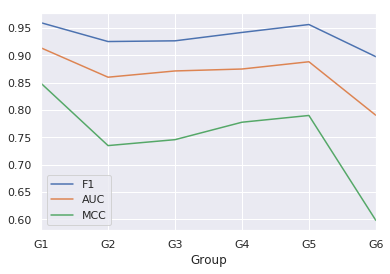

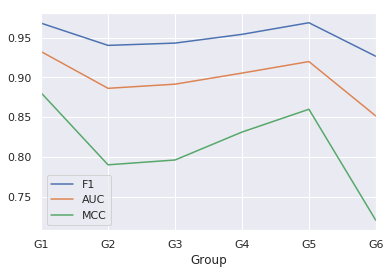

In [42]:
chart_df = iteration_info.loc[(iteration_info['Dataset']=='Full') & (iteration_info['Model']=='XGB') ]

chart_df.plot.line(x='Group', y=['F1', 'AUC', 'MCC'])
plt.show()

In [78]:
df.head()

tweetId           created_at lang  isRetweet  \
4  418765690913705984  2014-01-02 10:28:00   en       True   
5  418824767698124800  2014-01-02 14:23:00   en       True   
7  418832128680263681  2014-01-02 14:52:00   en       True   
8  418761769260040192  2014-01-02 10:12:00   en       True   
9  418775329440681985  2014-01-02 11:06:00   en       True   

  parent_tweet_created_at  hoursDiffFromParent  tweet_userId  followers_count  \
4     2014-01-02 08:55:00                    1    1951070833                5   
5     2014-01-02 08:55:00                    5    2200941410                5   
7     2014-01-02 08:55:00                    5    1966889118                3   
8     2014-01-02 08:50:00                    1      85837311              298   
9     2014-01-02 08:55:00                    2    2183958252                3   

  company_name afinn_verdict  afinn_score  afinn_comparative  \
4         AAPL      POSITIVE            6           0.272727   
5         AAPL      POSITIVE            6           0.272727   
7         AAPL      POSITIVE            6           0.272727   
8         AAPL      POSITIVE            3           0.136364   
9         AAPL      POSITIVE            6           0.272727   

   no_of_positive_words  no_of_negative_words positive_words negative_words  \
4                     2                     0       wins,top            NaN   
5                     2                     0       wins,top            NaN   
7                     2                     0       wins,top            NaN   
8                     2                     0     cry,gained            NaN   
9                     2                     0       wins,top            NaN   

                                        cleaned_text  \
4  rt philstockworld our top 3 trade ideas for 20...   
5  rt philstockworld our top 3 trade ideas for 20...   
7  rt philstockworld our top 3 trade ideas for 20...   
8  rt fortunemagazine apple gained 8 in 2013 vs s...   
9  rt philstockworld our top 3 trade ideas for 20...   

                                            raw_text                 Date  \
4  RT @philstockworld: Our Top 3 Trade Ideas for ...  2014-01-02 00:00:00   
5  RT @philstockworld: Our Top 3 Trade Ideas for ...  2014-01-02 00:00:00   
7  RT @philstockworld: Our Top 3 Trade Ideas for ...  2014-01-02 00:00:00   
8  RT @FortuneMagazine: Apple gained 8% in 2013 v...  2014-01-02 00:00:00   
9  RT @philstockworld: Our Top 3 Trade Ideas for ...  2014-01-02 00:00:00   

        Open       High        Low     Close  Adj Close      Volume  \
4  79.382858  79.575714  78.860001  79.01857   73.52253  58671200.0   
5  79.382858  79.575714  78.860001  79.01857   73.52253  58671200.0   
7  79.382858  79.575714  78.860001  79.01857   73.52253  58671200.0   
8  79.382858  79.575714  78.860001  79.01857   73.52253  58671200.0   
9  79.382858  79.575714  78.860001  79.01857   73.52253  58671200.0   

   volume_vs_5d_avg_vol  5d_gain_percent  5d_loss_percent 20d_gain_percent  \
4               1.09241              0.0         -3.33684         0.569091   
5               1.09241              0.0         -3.33684         0.569091   
7               1.09241              0.0         -3.33684         0.569091   
8               1.09241              0.0         -3.33684         0.569091   
9               1.09241              0.0         -3.33684         0.569091   

  20d_loss_percent                                   cleaned_text_new  \
4         -10.0214  Our Top  Trade Ideas for  and Two  Futures Win...   
5         -10.0214  Our Top  Trade Ideas for  and Two  Futures Win...   
7         -10.0214  Our Top  Trade Ideas for  and Two  Futures Win...   
8         -10.0214  Apple gained  in  vs SampP  but don cry for AA...   
9         -10.0214  Our Top  Trade Ideas for  and Two  Futures Win...   

                                   preprocessed_text      aapl   fb  stock  \
4  top trade idea two futur win alreadi bank gld ...  0.128071  0.0    0.0   
5  

In [122]:
df = top_few_company_tweets

positive_df = df.loc[df['afinn_verdict']=='POSITIVE']
negative_df = df.loc[df['afinn_verdict']=='NEGATIVE']

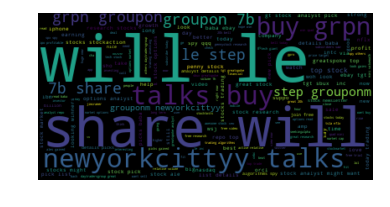

In [124]:
plotWordDensity(positive_df)

# SVM (linear)

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(C = 1)

# fit
svm_clf.fit(X_train, y_train)

# predict
y_pred_default = svm_clf.predict(X_test)

In [ ]:
printModelEfficiency(y_test, y_pred_default)

In [ ]:
printGainLossReport(X_test, y_pred_default)

# SVM (Kernel rbf)

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(C = 1, kernel='rbf')

# fit
svm_clf.fit(X_train, y_train)

# predict
y_pred_default = svm_clf.predict(X_test)

In [ ]:
printModelEfficiency(y_test, y_pred_default)

In [ ]:
printGainLossReport(X_test, y_pred_default)